In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1002.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

In [3]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1034.]


<function matplotlib.pyplot.show(*args, **kw)>

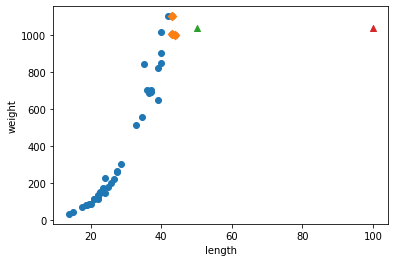

In [5]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker= 'D')

plt.scatter(50, 1034, marker='^')
plt.scatter(100, 1034, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [6]:
print(np.mean(train_target[indexes]))

1034.0


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1242.08231818]


In [8]:
print(lr.coef_, lr.intercept_)

[39.02624253] -709.229808381832


<function matplotlib.pyplot.show(*args, **kw)>

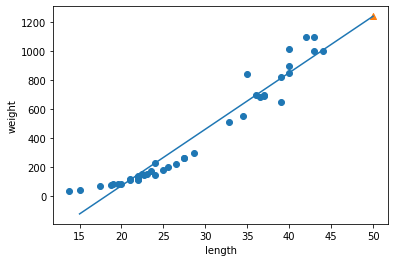

In [9]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1242.1, marker= '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [10]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398493498131346
0.8246397844947896


In [11]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [12]:
lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1574.6263416]
[  1.01554875 -21.62148405] 116.82867441839699


<function matplotlib.pyplot.show(*args, **kw)>

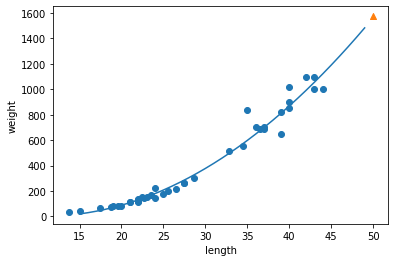

In [15]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01* point**2 - 21.62*point + 116.82)

plt.scatter(50, 1574, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [14]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9707434643237434
0.9775646411069824
